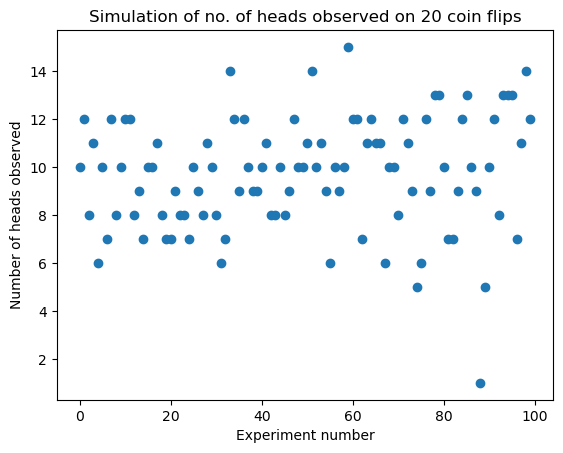

In [3]:
import random
import matplotlib.pyplot as plt

%matplotlib inline

"""Simulate multipe tosses of a fair coin. """

num_sims = 100
num_flips = 20

faces = ['H', 'T'] # Heads or tails

results = []
for sim in range(num_sims):
    coins = random.choices(faces, k=num_flips)
    results +=[ coins.count('H') ]

# print(results)
plt.scatter(range(num_sims), results)
plt.xlabel('Experiment number')
plt.ylabel('Number of heads observed')
plt.title('Simulation of no. of heads observed on 20 coin flips');

(array([ 1.,  0.,  2.,  5., 10., 26., 20., 26.,  6.,  4.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

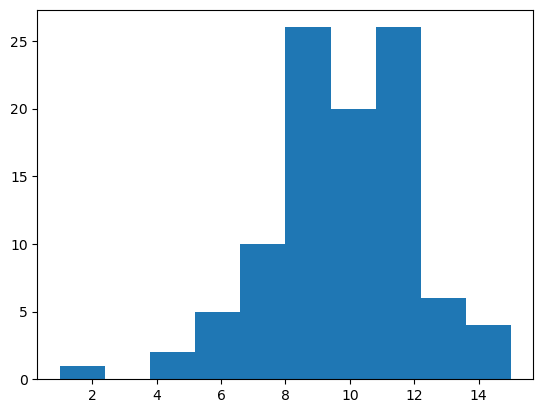

In [4]:
plt.hist(results)
# First two outputs are the counts and bin edges. The third output is a Matplotlib object

(array([ 1.,  0.,  0.,  0.,  2.,  5., 10., 13., 13., 20., 11., 15.,  6.,
         3.,  1.]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        ]),
 <BarContainer object of 15 artists>)

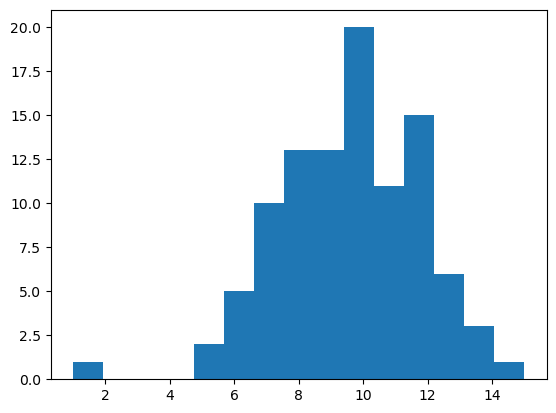

In [22]:
plt.hist(results, bins=15)

When working with integer data, it is typically best to make bins that are *one unit wide* with bin edges that are 0.5 units to each side of the bin centers.

In [16]:
#Using listcomp
binEdges = [i + 0.5 for i in range(16)]
print(binEdges)

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5]


In [21]:
#Another way: using Numpy arange
import numpy as np

edges = np.arange(0.5, 16.5, 1)
print(edges)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]


numpy.ndarray

Text(0, 0.5, 'Number of occurrences')

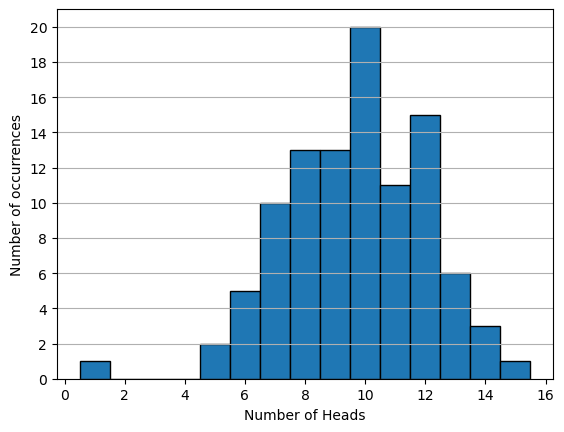

In [31]:
plt.hist(results, bins=edges, edgecolor='black');
plt.yticks(np.arange(0,22,2));
plt.grid(axis='y')
plt.xlabel('Number of Heads')
plt.ylabel('Number of occurrences')

In [26]:
new_edges = []
for i in range(1,16):
    new_edges += [i-0.2, i+0.2]

print(new_edges)

[0.8, 1.2, 1.8, 2.2, 2.8, 3.2, 3.8, 4.2, 4.8, 5.2, 5.8, 6.2, 6.8, 7.2, 7.8, 8.2, 8.8, 9.2, 9.8, 10.2, 10.8, 11.2, 11.8, 12.2, 12.8, 13.2, 13.8, 14.2, 14.8, 15.2]


Text(0, 0.5, 'Number of occurrences')

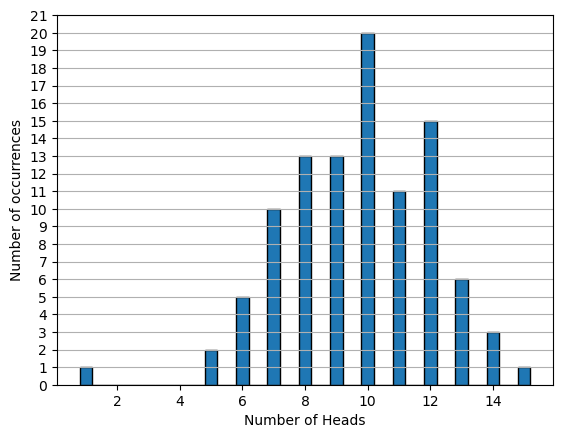

In [36]:
plt.hist(results, bins=new_edges, edgecolor='black');
plt.yticks(np.arange(0,22));
plt.grid(axis='y')
plt.xlabel('Number of Heads')
plt.ylabel('Number of occurrences')

In [60]:
#Test for building the edges array with a single listcomp
testedge = [f(x) for x in range(1,16) for f in [lambda x: x-0.5, lambda x: x+0.5]]
print(testedge)

[0.5, 1.5, 1.5, 2.5, 2.5, 3.5, 3.5, 4.5, 4.5, 5.5, 5.5, 6.5, 6.5, 7.5, 7.5, 8.5, 8.5, 9.5, 9.5, 10.5, 10.5, 11.5, 11.5, 12.5, 12.5, 13.5, 13.5, 14.5, 14.5, 15.5]


The **counts** of the outcomes can be used to estimate the probabilities of the outcomes
if we turn them into relative frequencies.

If the bin widths **are one unit wide**, then the relative frequencies can be
found by setting the keyword parameter `density=True`:

Text(0, 0.5, 'Relative frequency')

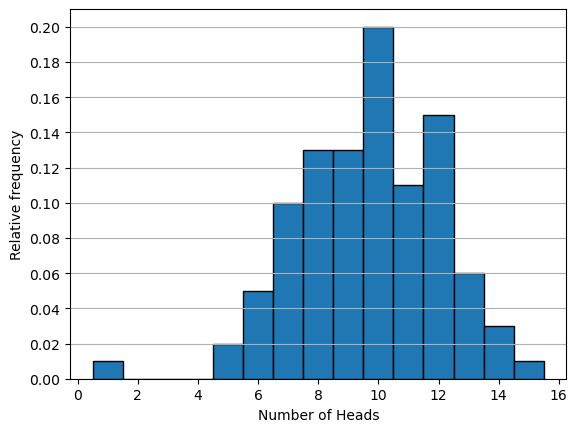

In [76]:
plt.hist(results, bins=edges, edgecolor='black', density=True);
plt.grid(axis='y')
plt.yticks(np.arange(0,0.21,0.02))
plt.xlabel('Number of Heads')
plt.ylabel('Relative frequency')

The `density=True` parameter normalizes the histogram so that the area under it is 1 (that's why the width of each bin ought to be 1 if we are to represent relative frequencies). So, in this case, the height of each column represents the relative frequency of the observed results with respect to the 100 coin tosses.

`np.unique()` returns a list of the unique values in a list or array. Ir `return_counts=True` is also passed to that function, it will also return an array that contains a count of each unique item.

In [86]:
vals, counts = np.unique(results, return_counts=True)
print(vals,'\n',counts)

[ 1  5  6  7  8  9 10 11 12 13 14 15] 
 [ 1  2  5 10 13 13 20 11 15  6  3  1]


In [89]:
#Obtain the relative frequencies by dividing by the sum of the counts (total number of experiments)
counts/counts.sum()

array([0.01, 0.02, 0.05, 0.1 , 0.13, 0.13, 0.2 , 0.11, 0.15, 0.06, 0.03,
       0.01])

## First statistical test

**¿How often 6 or fewer head occur when flipping a fair coin 20 times?**

Put an `if` in the simulation loop to check if the number of heads observed is less than or equal to 6 and call a `print`statement if that condition is satisfied.

In [96]:
import random

random.seed(1324)

faces = ['H', 'T']

num_sims = 100
flips = 20

# best practice: put any threshold outside the simulation loop
threshold = 6

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads <= threshold:
        print(f'{sim:>2} : {num_heads} heads')

 5 : 6 heads
17 : 4 heads
28 : 6 heads
67 : 6 heads
79 : 6 heads


In [97]:
def coinsim_print(num_sims=100, threshold=6, flips=20):
    '''
    Simulate multiple experiments, where each experiment involves flipping a
    coin a specified number of times and printing the results of the experiment
    if the number of heads observed is <= a threshold

    Arguments:
    ----------

        threshold: will print if the number of heads observed is <= this value
        num_sims: the total number of experiments to simulate
        filps: the number of coin flips per experiment
    '''

    for sim in range(num_sims):
        coins = random.choices(faces, k=flips)
        num_heads = coins.count('H')
        if num_heads <= threshold:
            print(f'{sim:>2} : {num_heads} heads')

In [98]:
coinsim_print()

37 : 6 heads
44 : 5 heads
55 : 6 heads
79 : 6 heads
86 : 5 heads


Our goal is to estimate the probability of seeing a result that satisfies our threshold condition. This can be estimated using the relative frequency of those results.

In [102]:
num_sims = 1000
flips = 20

threshold = 6

# count how many experiments satisfy the criteria
event_count = 0

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads <= threshold:
        event_count += 1

print(f'Relative frequency of  {threshold} or fewer heads is',
      f'{event_count / num_sims}')

Relative frequency of  6 or fewer heads is 0.073


In [104]:
def coinsim(num_sims=1000, threshold=6, flips=20):
    '''
    Simulate multiple experiments, where each experiment involves flipping a coin
    a specified number of times and printing the results of the experiment if the
    number of heads observed is <= a threshold

    Arguments:
    ----------

    threshold: will print if the number of heads observed is <= this value
    num_sims: the total number of experiments to simulate
    flips: the number of coin flips in one experiment
    '''

    # count how many experiments satisfy the criteria
    event_count = 0

    for sim in range(num_sims):
        coins = random.choices(faces, k=flips)
        num_heads = coins.count('H')
        if num_heads <= threshold:
            event_count += 1

    print(f'Relative frequency of  {threshold} or fewer heads is',
          f'{event_count / num_sims}')

In [108]:
coinsim(1_000_000)

Relative frequency of  6 or fewer heads is 0.057658


In [110]:
coinsim(1_000_000, threshold=4)

Relative frequency of  4 or fewer heads is 0.005875


In [111]:
coinsim(200_000, threshold=2, flips=12)

Relative frequency of  2 or fewer heads is 0.019055


# Self assessment

In [4]:
import random
from icecream import ic

def dicesim(num_sims, faces, value, threshold, rolls):
    '''
    Simulate multiple experiments, where each experiment involves rolling a
    die with certain number of faces a specific number of times and printing the
    results of the experiment if the number of times a certain value is obtained
    is smaller <= a threshold.

    Arguments:
    ----------

    num_sims: the total number of experiments to simulate
    faces: number of faces of the die
    value: if the die roll lands on this value, the event is successful
    threshold: will print if the number of successful events is <= this value
    rolls: number of rolls per experiment
    '''

    event_count = 0

    for sim in range(num_sims):
        dice = random.choices(range(1,faces+1), k=rolls)
        # ic(f'{dice!r}')
        if dice.count(value) <= threshold:
            event_count += 1
            # ic(f'{sim:2} : {dice.count(value)}')

    print(event_count / num_sims)

In [5]:
dicesim(200_000, faces=6, value=6, threshold=1, rolls=30)

0.02909
